<a href="https://colab.research.google.com/github/11daspolo/-ZidioDevelopment_Internship/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Archive:  toronto-emotional-speech-set-tess.zip
replace TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths = []
labels = []
import os
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        if len(paths) == 2800:
            break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [ ]:
# Create a DataFrame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.sample(5)

,speech,label
1882,/content/TESS Toronto emotional speech set dat...,fear
112,/content/TESS Toronto emotional speech set dat...,angry
234,/content/TESS Toronto emotional speech set dat...,ps
2575,/content/TESS Toronto emotional speech set dat...,neutral
2238,/content/TESS Toronto emotional speech set dat...,sad


In [ ]:
df['label'].value_counts()

,count
label,
angry,400
ps,400
happy,400
disgust,400
sad,400
fear,400
neutral,400


In [ ]:
df['label_count']= df['label'].value_counts()
df.drop('label_count', axis=1)

,speech,label
0,/content/TESS Toronto emotional speech set dat...,angry
1,/content/TESS Toronto emotional speech set dat...,angry
2,/content/TESS Toronto emotional speech set dat...,angry
3,/content/TESS Toronto emotional speech set dat...,angry
4,/content/TESS Toronto emotional speech set dat...,angry
...,...,...
2795,/content/TESS Toronto emotional speech set dat...,angry
2796,/content/TESS Toronto emotional speech set dat...,angry
2797,/content/TESS Toronto emotional speech set dat...,angry
2798,/content/TESS Toronto emotional speech set dat...,angry


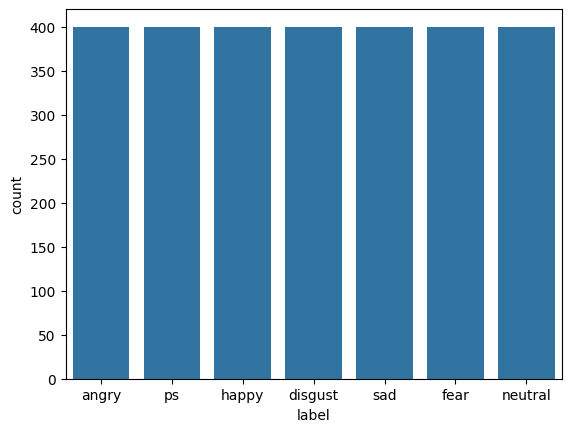

In [ ]:
sns.countplot(x = df['label'])
plt.show()

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


In [ ]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [ ]:
print(df.head())

                                              speech  label  label_count
0  /content/TESS Toronto emotional speech set dat...  angry          NaN
1  /content/TESS Toronto emotional speech set dat...  angry          NaN
2  /content/TESS Toronto emotional speech set dat...  angry          NaN
3  /content/TESS Toronto emotional speech set dat...  angry          NaN
4  /content/TESS Toronto emotional speech set dat...  angry          NaN


In [ ]:
print(df['label'].unique())

['angry' 'ps' 'happy' 'disgust' 'sad' 'fear' 'neutral']


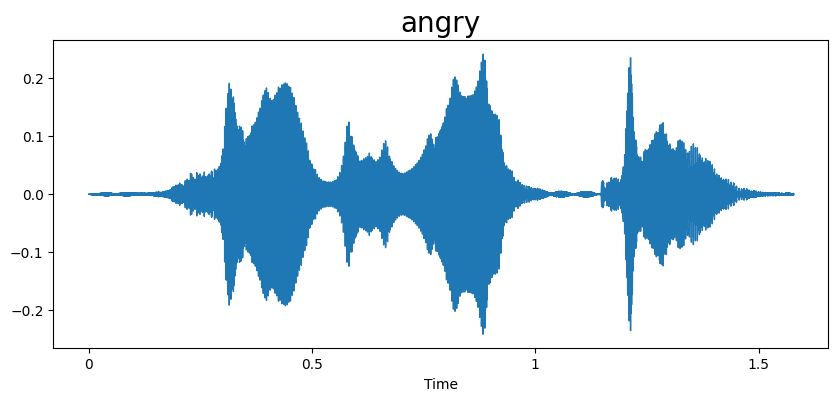

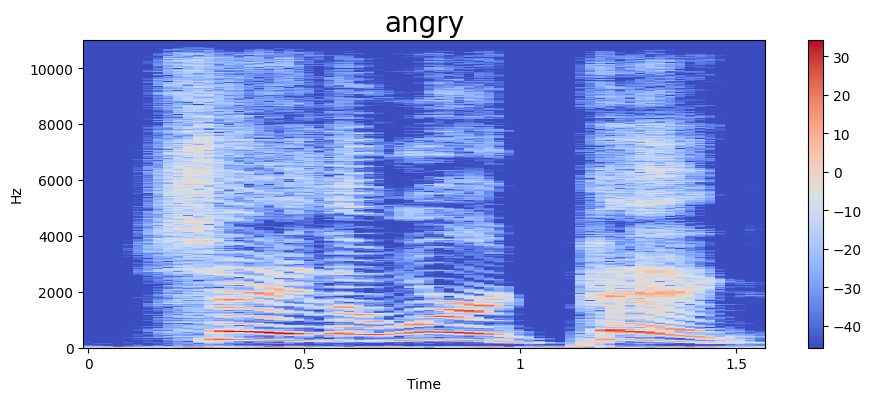

In [ ]:
emotion = 'angry'
path = df['speech'][df['label'] == emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

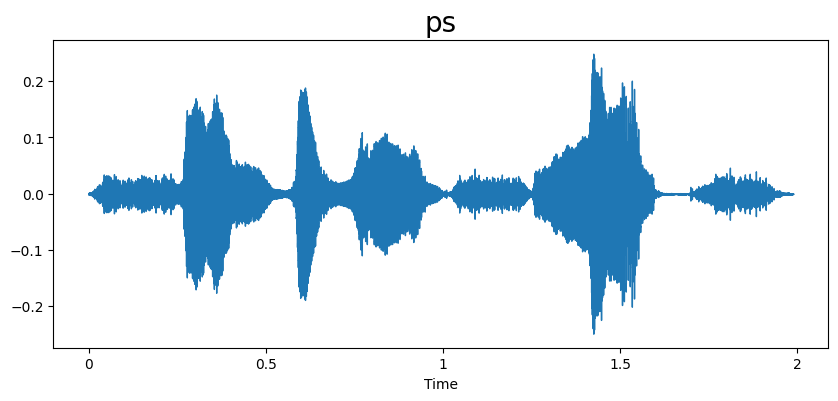

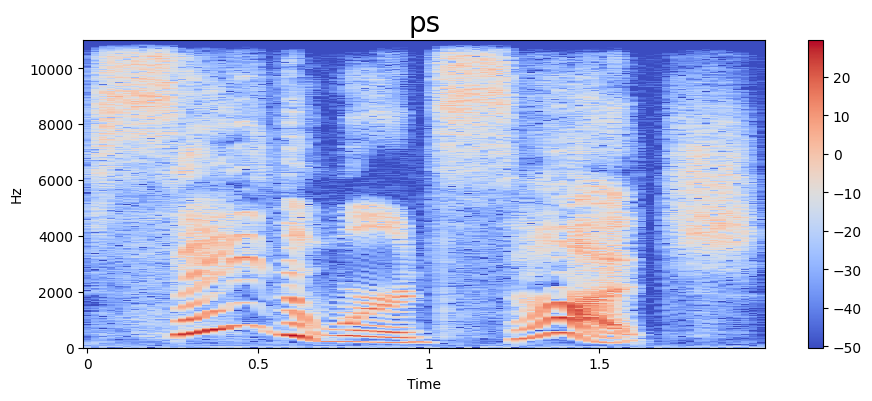

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

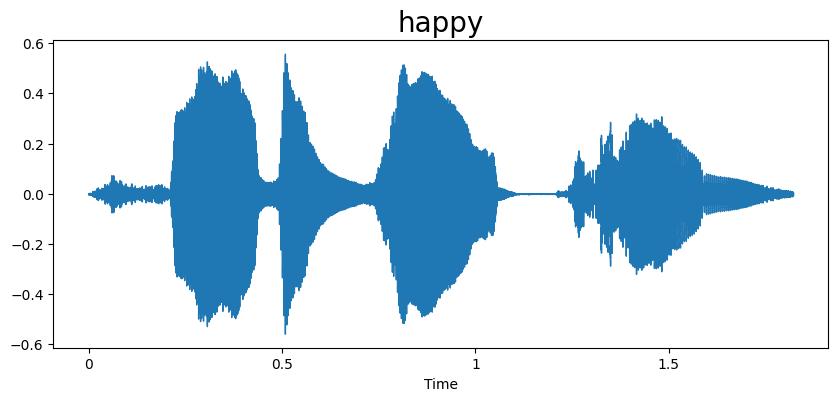

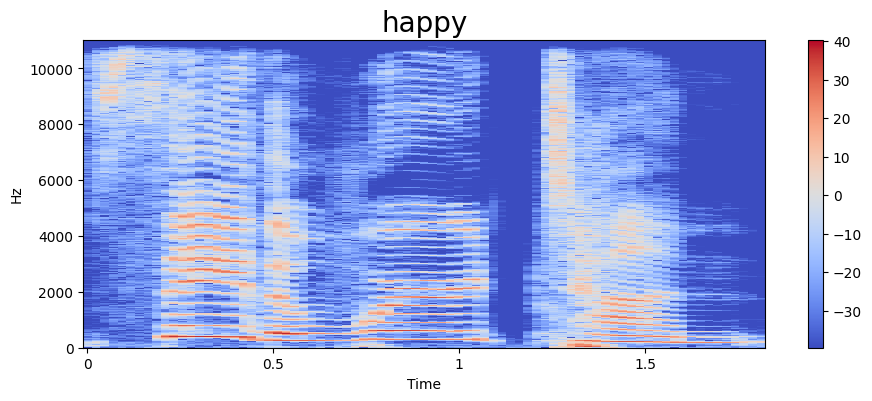

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

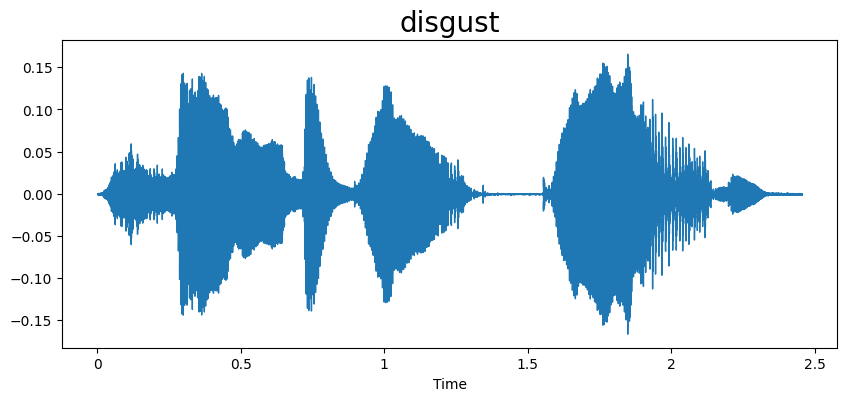

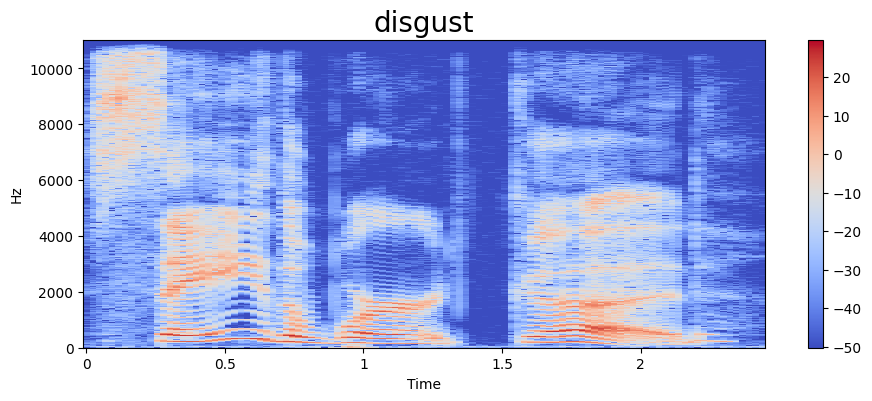

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

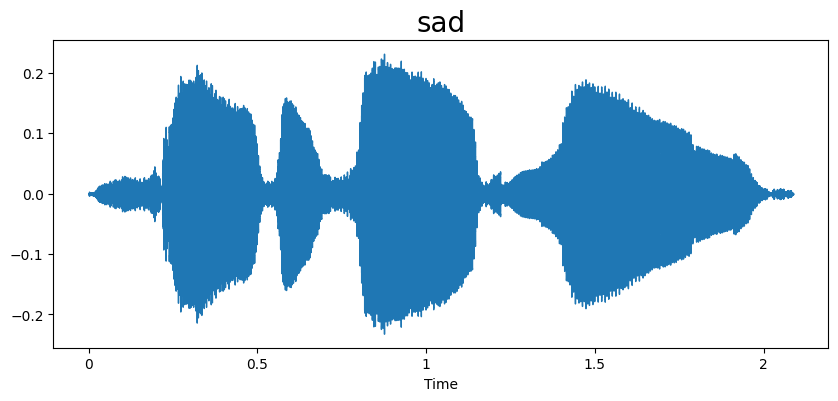

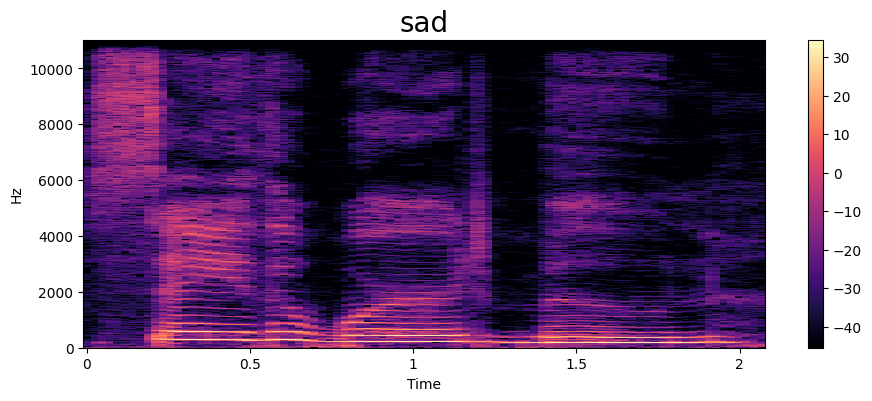

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

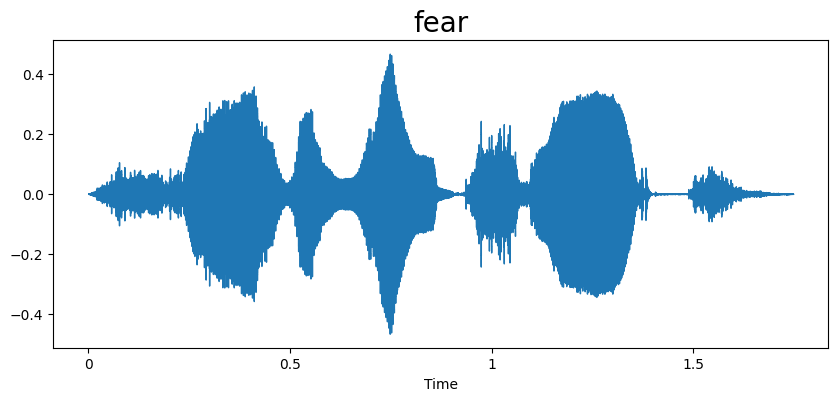

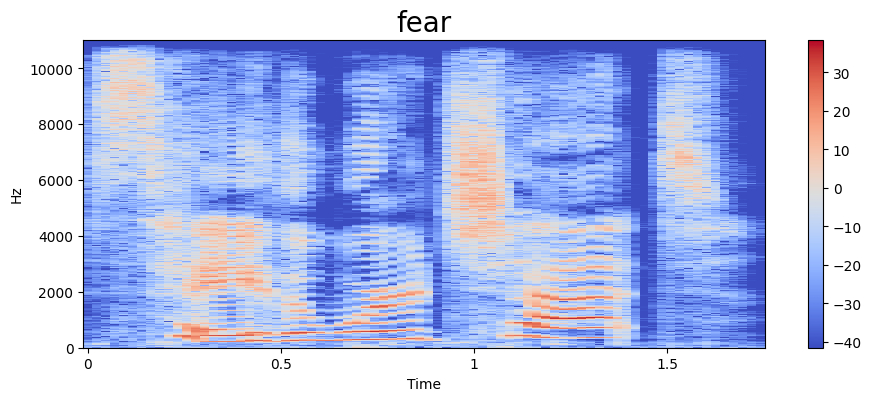

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

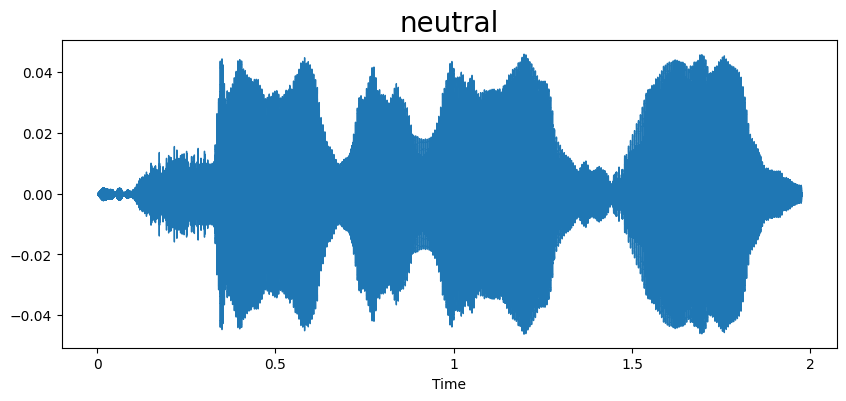

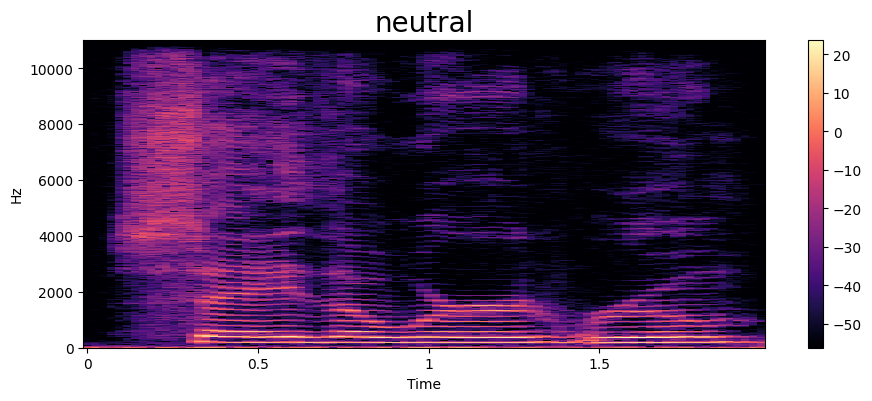

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr,n_mfcc=40).T, axis = 0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.15304657e+02,  8.15061111e+01, -5.90106249e+00, -1.16531563e+00,
        1.49794090e+00,  7.62098455e+00, -2.95427265e+01, -1.01863356e+01,
       -1.55911245e+01, -4.31961679e+00, -1.44578016e+00,  2.12607563e-01,
        3.96969527e-01,  1.01159251e+00, -1.12728447e-01, -1.00892377e+00,
       -6.78602266e+00, -1.97202754e+00, -5.05674458e+00, -1.21203728e+01,
       -2.26096416e+00, -1.38849950e+00, -3.85491657e+00,  1.07494011e+01,
        8.10441017e+00,  1.84317684e+01,  1.18784075e+01,  1.70502872e+01,
        1.45659466e+01,  1.56348219e+01,  8.54758453e+00,  7.66160822e+00,
        5.50558424e+00,  4.23783445e+00,  9.01977825e+00,  5.36226702e+00,
        8.31169128e+00,  8.19802189e+00, -1.23748004e+00,  1.49522305e+00],
      dtype=float32)

In [ ]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
x_mfcc

,speech
0,"[-415.30466, 81.50611, -5.9010625, -1.1653156,..."
1,"[-393.31836, 92.926285, 4.4558163, -23.756584,..."
2,"[-418.5793, 73.231026, 9.666024, -16.868618, -..."
3,"[-421.6649, 102.702255, 10.90602, -31.783535, ..."
4,"[-431.74622, 77.24131, 8.511243, -3.0904095, -..."
...,...
2795,"[-294.5169, 22.169518, 17.417767, 10.242752, -..."
2796,"[-333.38745, 63.86061, -3.2831573, 17.142277, ..."
2797,"[-289.04367, 79.062164, -18.213083, 13.74042, ..."
2798,"[-341.13345, 61.820747, -22.043692, 32.27892, ..."


In [ ]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(2800, 40)

In [ ]:
# input Split
x = np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state =42)

In [ ]:
# create the LSTM Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(40, 1)),
    Dropout(0.5),
    LSTM(128, return_sequences=False),  # Added another LSTM layer
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 40, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 40, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,535 (1.86 MB)

 Trainable params: 486,535 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=64,
                    shuffle=True)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 336ms/step - accuracy: 0.2211 - loss: 1.8712 - val_accuracy: 0.6116 - val_loss: 1.1587
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.5074 - loss: 1.2512 - val_accuracy: 0.7031 - val_loss: 0.8207
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 281ms/step - accuracy: 0.6328 - loss: 0.9344 - val_accuracy: 0.8326 - val_loss: 0.5049
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 335ms/step - accuracy: 0.7248 - loss: 0.7209 - val_accuracy: 0.8661 - val_loss: 0.4691
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.7741 - loss: 0.5916 - val_accuracy: 0.9062 - val_loss: 0.2833
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.8478 - loss: 0.4431 - val_accuracy: 0.8616 - val_loss: 0.4356
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - accuracy: 0.8452 - loss: 0.5016 - val_accuracy: 0.9129 - val_loss: 0.2383
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 377ms/step - accuracy: 0.8877 - loss: 0.3605 - val_accura

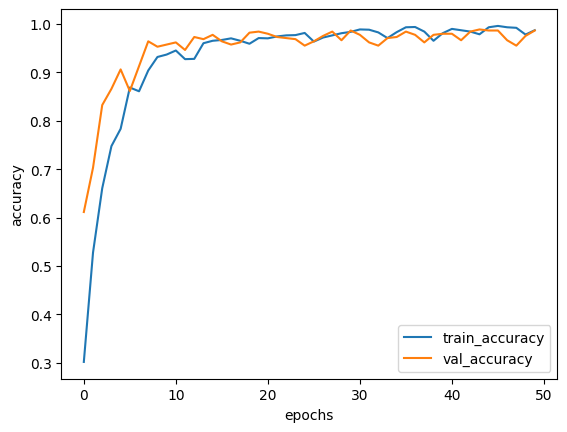

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train_accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

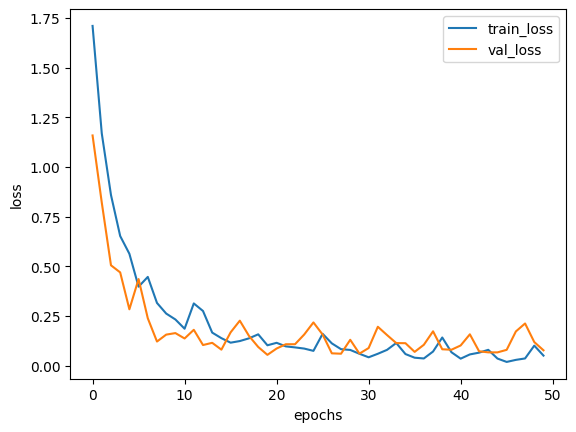

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train_loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
best_train_acc = max(acc)
best_val_acc = max(val_acc)

print(f"Best Training Accuracy: {best_train_acc * 100:.2f}%")
print(f"Best Validation Accuracy: {best_val_acc * 100:.2f}%")

Best Training Accuracy: 99.61%
Best Validation Accuracy: 98.88%


In [ ]:
best_train_loss = min(loss)
best_val_loss = min(val_loss)

print(f"Lowest Training Loss: {best_train_loss:.4f}")
print(f"Lowest Validation Loss: {best_val_loss:.4f}")

Lowest Training Loss: 0.0184
Lowest Validation Loss: 0.0539
